In [1]:
import os

#add the root directory
os.chdir('../')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import h5py

<h2> Create augmented autoignition dataset for PV encoder-decoder training

Augmented autoignition: with time and log(H2O2) in the dataset

In [3]:
filename_autoignition = "isochoric-adiabatic-closed-HR-H2-air-lin_Z_0.015_0.035_50-T0_900-"
path_data_autoignition = "data-files/autoignition/"
path_data = "data-files/"

In [4]:
mixture_fractions_train = np.loadtxt(f"{path_data_autoignition}{filename_autoignition}mixture-fraction.csv") #1 x nbr_timesteps
state_space_names = np.genfromtxt(f"{path_data_autoignition}{filename_autoignition}state-space-names.csv", delimiter=",", dtype=str)
state_space_train = pd.read_csv(f"{path_data_autoignition}{filename_autoignition}state-space.csv", names = state_space_names)
state_space_source_train = pd.read_csv(f"{path_data_autoignition}{filename_autoignition}state-space-sources.csv", names = state_space_names)
time_train = pd.read_csv(f"{path_data_autoignition}{filename_autoignition}time.csv", names = ["time"])

mixture_fractions_test = np.loadtxt(f"{path_data_autoignition}{filename_autoignition}mixture-fractions-test-trajectories.csv")

In [5]:
print(f"Number of observations: {len(state_space_train)}")

Number of observations: 120772


Visualize the f-T manifold of the training dataset

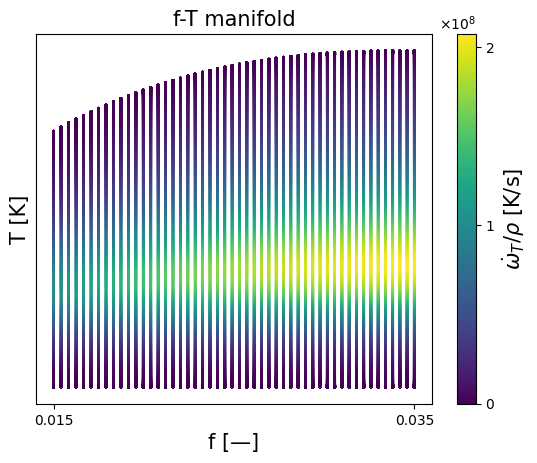

In [6]:
save = False
pathSave = "C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Autoignition/Z_0.015-0.035-T_900K/"
name = "f-T train 0.015-0.035 900K small points.png"

manifold = plt.scatter(mixture_fractions_train.reshape(-1,1), state_space_train["T"], c = state_space_source_train["T"], s=1)
plt.title("f-T manifold", fontsize = 15)
plt.xlabel("f [\u2014]", fontsize = 15)
plt.xticks([0.015, 0.035])
plt.ylabel("T [K]", fontsize = 15)
plt.yticks([])
cbar = plt.colorbar(manifold)
cbar.set_ticks([0, 100000000, 200000000])
cbar.set_label(r'$\dot{\omega}_{T} / \rho$ [K/s]', fontsize=15)
cbar.formatter = ticker.ScalarFormatter(useMathText=True)
cbar.formatter.set_powerlimits((0, 0))  # Forces scientific notation
cbar.update_ticks()
if(save):
    plt.savefig(pathSave + name, dpi=300)
plt.show()

f-T manifold with the test curves

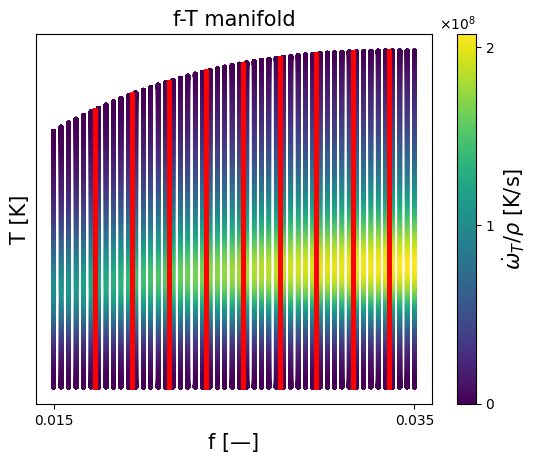

In [7]:
save = True
pathSave = "C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Autoignition/Z_0.015-0.035-T_900K/"
name = "f-T train 0.015-0.035 900K - 50 trajectories - with test trajectories.png"

manifold = plt.scatter(mixture_fractions_train.reshape(-1,1), state_space_train["T"], c = state_space_source_train["T"], s=5)

#add the test curves
for i in range(9):
        with h5py.File(f"{path_data_autoignition}{filename_autoignition}state-space-test-trajectories.h5", 'r') as hf:
            test_trajectory = pd.DataFrame(hf[f'test_trajectory_{i}'][:], columns = state_space_names)
            plt.scatter(np.full(test_trajectory["T"].shape[0], mixture_fractions_test[i]), test_trajectory["T"], c = "red", s=5)

plt.title("f-T manifold", fontsize = 15)
plt.xlabel("f [\u2014]", fontsize = 15)
plt.xticks([0.015, 0.035])
plt.ylabel("T [K]", fontsize = 15)
plt.yticks([])
cbar = plt.colorbar(manifold)
cbar.set_ticks([0, 100000000, 200000000])
cbar.set_label(r'$\dot{\omega}_{T} / \rho$ [K/s]', fontsize=15)
cbar.formatter = ticker.ScalarFormatter(useMathText=True)
cbar.formatter.set_powerlimits((0, 0))  # Forces scientific notation
cbar.update_ticks()
if(save):
    plt.savefig(pathSave + name, dpi=300)
plt.show()

<h2> Create the dataset for PV training according to the usual format of this dataset

In [8]:
state_space_names_DNS = np.genfromtxt(f"{path_data}Xu-state-space-names.csv", delimiter=",", dtype=str)

In [9]:
state_space_names_DNS

array(['H2NN', 'H2O2', 'H2O', 'H2', 'HNO', 'HO2', 'HONO2', 'HONO', 'H',
       'N2H3', 'N2O', 'N2', 'NH2', 'NH', 'NNH', 'NO2', 'NO', 'N', 'O2',
       'OH', 'O'], dtype='<U5')

In [10]:
state_space_train_DNS = state_space_train[state_space_names_DNS]
state_space_source_train_DNS = state_space_source_train[state_space_names_DNS]

In [11]:
state_space_train_DNS.shape

(120772, 21)

In [12]:
state_space_train_DNS

,H2NN,H2O2,H2O,H2,HNO,HO2,HONO2,HONO,H,N2H3,...,N2,NH2,NH,NNH,NO2,NO,N,O2,OH,O
0,0.000000e+00,0.000000e+00,0.000000e+00,0.015000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.754555,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.230445,0.000000e+00,0.000000e+00
1,2.844234e-32,1.061583e-23,5.645367e-24,0.015000,0.000000,6.024539e-16,3.950602e-59,3.962549e-46,1.839615e-17,0.000000e+00,...,0.754555,7.730958e-37,6.872536e-45,4.724079e-23,2.735306e-36,0.000000,9.428729e-40,0.230445,7.061623e-21,6.647409e-21
2,5.972354e-32,4.681798e-23,5.224900e-23,0.015000,0.000000,1.265240e-15,1.546258e-57,3.669567e-45,3.862829e-17,0.000000e+00,...,0.754555,2.489837e-36,1.979208e-43,1.537630e-22,1.206202e-35,0.000000,8.730269e-39,0.230445,3.111576e-20,2.931157e-20
3,9.412430e-32,1.163194e-22,2.044584e-22,0.015000,0.000000,1.994411e-15,1.499552e-56,1.436875e-44,6.087925e-17,0.000000e+00,...,0.754555,3.222223e-36,1.492776e-42,2.910734e-22,2.996445e-35,0.000000,3.417921e-38,0.230445,7.723228e-20,7.281138e-20
4,1.319523e-31,2.286880e-22,5.631534e-22,0.015000,0.000000,2.796627e-15,8.115392e-56,3.960432e-44,8.535000e-17,0.000000e+00,...,0.754555,0.000000e+00,6.456236e-42,4.487158e-22,5.890248e-35,0.000000,9.419152e-38,0.230445,1.516797e-19,1.431211e-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120767,6.176670e-13,6.804998e-07,2.248855e-01,0.007949,0.000001,5.934082e-06,4.862856e-12,1.379414e-07,9.147980e-04,3.914561e-14,...,0.736218,3.054478e-07,5.872823e-07,1.327949e-07,1.374405e-06,0.006452,2.064271e-06,0.005181,1.635881e-02,2.028545e-03
120768,6.125083e-13,6.804998e-07,2.248855e-01,0.007949,0.000001,5.934082e-06,4.862856e-12,1.379414e-07,9.147980e-04,4.670315e-14,...,0.736218,3.054478e-07,5.872823e-07,1.327949e-07,1.374405e-06,0.006452,2.064271e-06,0.005181,1.635881e-02,2.028545e-03
120769,6.472880e-13,6.804998e-07,2.248855e-01,0.007949,0.000001,5.934082e-06,4.862856e-12,1.379414e-07,9.147980e-04,1.255174e-15,...,0.736218,3.054478e-07,5.872823e-07,1.327949e-07,1.374405e-06,0.006452,2.064271e-06,0.005181,1.635881e-02,2.028545e-03
120770,6.374683e-13,6.804998e-07,2.248855e-01,0.007949,0.000001,5.934082e-06,4.862856e-12,1.379414e-07,9.147980e-04,1.411848e-14,...,0.736218,3.054478e-07,5.872823e-07,1.327949e-07,1.374405e-06,0.006452,2.064271e-06,0.005181,1.635881e-02,2.028545e-03


In [15]:
state_space_train_DNS["logH2O2-10"] = np.log10(state_space_train_DNS["H2O2"] + 1e-10)

In [16]:
state_space_train_DNS

,H2NN,H2O2,H2O,H2,HNO,HO2,HONO2,HONO,H,N2H3,...,NH2,NH,NNH,NO2,NO,N,O2,OH,O,logH2O2-10
0,0.000000e+00,0.000000e+00,0.000000e+00,0.015000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.230445,0.000000e+00,0.000000e+00,-10.000000
1,2.844234e-32,1.061583e-23,5.645367e-24,0.015000,0.000000,6.024539e-16,3.950602e-59,3.962549e-46,1.839615e-17,0.000000e+00,...,7.730958e-37,6.872536e-45,4.724079e-23,2.735306e-36,0.000000,9.428729e-40,0.230445,7.061623e-21,6.647409e-21,-10.000000
2,5.972354e-32,4.681798e-23,5.224900e-23,0.015000,0.000000,1.265240e-15,1.546258e-57,3.669567e-45,3.862829e-17,0.000000e+00,...,2.489837e-36,1.979208e-43,1.537630e-22,1.206202e-35,0.000000,8.730269e-39,0.230445,3.111576e-20,2.931157e-20,-10.000000
3,9.412430e-32,1.163194e-22,2.044584e-22,0.015000,0.000000,1.994411e-15,1.499552e-56,1.436875e-44,6.087925e-17,0.000000e+00,...,3.222223e-36,1.492776e-42,2.910734e-22,2.996445e-35,0.000000,3.417921e-38,0.230445,7.723228e-20,7.281138e-20,-10.000000
4,1.319523e-31,2.286880e-22,5.631534e-22,0.015000,0.000000,2.796627e-15,8.115392e-56,3.960432e-44,8.535000e-17,0.000000e+00,...,0.000000e+00,6.456236e-42,4.487158e-22,5.890248e-35,0.000000,9.419152e-38,0.230445,1.516797e-19,1.431211e-19,-10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120767,6.176670e-13,6.804998e-07,2.248855e-01,0.007949,0.000001,5.934082e-06,4.862856e-12,1.379414e-07,9.147980e-04,3.914561e-14,...,3.054478e-07,5.872823e-07,1.327949e-07,1.374405e-06,0.006452,2.064271e-06,0.005181,1.635881e-02,2.028545e-03,-6.167108
120768,6.125083e-13,6.804998e-07,2.248855e-01,0.007949,0.000001,5.934082e-06,4.862856e-12,1.379414e-07,9.147980e-04,4.670315e-14,...,3.054478e-07,5.872823e-07,1.327949e-07,1.374405e-06,0.006452,2.064271e-06,0.005181,1.635881e-02,2.028545e-03,-6.167108
120769,6.472880e-13,6.804998e-07,2.248855e-01,0.007949,0.000001,5.934082e-06,4.862856e-12,1.379414e-07,9.147980e-04,1.255174e-15,...,3.054478e-07,5.872823e-07,1.327949e-07,1.374405e-06,0.006452,2.064271e-06,0.005181,1.635881e-02,2.028545e-03,-6.167108
120770,6.374683e-13,6.804998e-07,2.248855e-01,0.007949,0.000001,5.934082e-06,4.862856e-12,1.379414e-07,9.147980e-04,1.411848e-14,...,3.054478e-07,5.872823e-07,1.327949e-07,1.374405e-06,0.006452,2.064271e-06,0.005181,1.635881e-02,2.028545e-03,-6.167108


In [17]:
state_space_train_DNS["logH2O2-20"] = np.log10(state_space_train_DNS["H2O2"] + 1e-20)

In [27]:
state_space_train_DNS

,H2NN,H2O2,H2O,H2,HNO,HO2,HONO2,HONO,H,N2H3,...,NH,NNH,NO2,NO,N,O2,OH,O,logH2O2-10,logH2O2-20
0,0.000000e+00,0.000000e+00,0.000000e+00,0.015000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.230445,0.000000e+00,0.000000e+00,-10.000000,-20.000000
1,2.844234e-32,1.061583e-23,5.645367e-24,0.015000,0.000000,6.024539e-16,3.950602e-59,3.962549e-46,1.839615e-17,0.000000e+00,...,6.872536e-45,4.724079e-23,2.735306e-36,0.000000,9.428729e-40,0.230445,7.061623e-21,6.647409e-21,-10.000000,-19.999539
2,5.972354e-32,4.681798e-23,5.224900e-23,0.015000,0.000000,1.265240e-15,1.546258e-57,3.669567e-45,3.862829e-17,0.000000e+00,...,1.979208e-43,1.537630e-22,1.206202e-35,0.000000,8.730269e-39,0.230445,3.111576e-20,2.931157e-20,-10.000000,-19.997971
3,9.412430e-32,1.163194e-22,2.044584e-22,0.015000,0.000000,1.994411e-15,1.499552e-56,1.436875e-44,6.087925e-17,0.000000e+00,...,1.492776e-42,2.910734e-22,2.996445e-35,0.000000,3.417921e-38,0.230445,7.723228e-20,7.281138e-20,-10.000000,-19.994977
4,1.319523e-31,2.286880e-22,5.631534e-22,0.015000,0.000000,2.796627e-15,8.115392e-56,3.960432e-44,8.535000e-17,0.000000e+00,...,6.456236e-42,4.487158e-22,5.890248e-35,0.000000,9.419152e-38,0.230445,1.516797e-19,1.431211e-19,-10.000000,-19.990180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120767,6.176670e-13,6.804998e-07,2.248855e-01,0.007949,0.000001,5.934082e-06,4.862856e-12,1.379414e-07,9.147980e-04,3.914561e-14,...,5.872823e-07,1.327949e-07,1.374405e-06,0.006452,2.064271e-06,0.005181,1.635881e-02,2.028545e-03,-6.167108,-6.167172
120768,6.125083e-13,6.804998e-07,2.248855e-01,0.007949,0.000001,5.934082e-06,4.862856e-12,1.379414e-07,9.147980e-04,4.670315e-14,...,5.872823e-07,1.327949e-07,1.374405e-06,0.006452,2.064271e-06,0.005181,1.635881e-02,2.028545e-03,-6.167108,-6.167172
120769,6.472880e-13,6.804998e-07,2.248855e-01,0.007949,0.000001,5.934082e-06,4.862856e-12,1.379414e-07,9.147980e-04,1.255174e-15,...,5.872823e-07,1.327949e-07,1.374405e-06,0.006452,2.064271e-06,0.005181,1.635881e-02,2.028545e-03,-6.167108,-6.167172
120770,6.374683e-13,6.804998e-07,2.248855e-01,0.007949,0.000001,5.934082e-06,4.862856e-12,1.379414e-07,9.147980e-04,1.411848e-14,...,5.872823e-07,1.327949e-07,1.374405e-06,0.006452,2.064271e-06,0.005181,1.635881e-02,2.028545e-03,-6.167108,-6.167172


In [33]:
time_train

,time
0,0.000000e+00
1,1.000000e-09
2,2.100000e-09
3,3.310000e-09
4,4.641000e-09
...,...
120767,9.631403e-02
120768,9.655928e-02
120769,9.682905e-02
120770,9.712581e-02


In [18]:
state_space_source_train_DNS

,H2NN,H2O2,H2O,H2,HNO,HO2,HONO2,HONO,H,N2H3,...,N2,NH2,NH,NNH,NO2,NO,N,O2,OH,O
0,2.844430e-23,0.000000e+00,0.000000e+00,-3.679546e-08,0.000000e+00,6.024161e-07,0.000000e+00,0.000000e+00,1.839773e-08,0.000000e+00,...,-1.302200e-18,0.000000e+00,0.000000e+00,9.938298e-19,0.000000e+00,0.000000e+00,0.000000e+00,-5.840184e-07,0.000000e+00,2.748684e-19
1,2.844072e-23,2.123211e-14,1.693289e-14,-3.679546e-08,5.151151e-37,6.024917e-07,1.888657e-49,1.188750e-36,1.839458e-08,9.710531e-58,...,-7.719517e-14,1.905441e-27,3.074833e-35,7.997246e-14,5.470480e-27,6.060728e-30,2.828454e-30,-5.841182e-07,1.411788e-11,1.329409e-11
2,2.843680e-23,4.459051e-14,7.461168e-14,-3.679547e-08,1.667841e-36,6.025748e-07,3.669805e-48,5.242094e-36,1.839112e-08,1.887161e-56,...,-1.043432e-13,4.001065e-27,4.238593e-34,1.080973e-13,1.148697e-26,2.672892e-29,1.247029e-29,-5.842281e-07,2.961043e-11,2.791259e-11
3,2.843247e-23,7.028846e-14,1.851933e-13,-3.679548e-08,2.220747e-36,6.026662e-07,2.262809e-47,1.302240e-35,1.838732e-08,1.163837e-55,...,-1.128649e-13,6.305679e-27,1.975266e-33,1.169257e-13,1.810347e-26,6.640803e-29,3.097217e-29,-5.843489e-07,4.660742e-11,4.398688e-11
4,2.842772e-23,9.856072e-14,3.637089e-13,-3.679551e-08,3.253147e-37,6.027668e-07,8.735817e-47,2.559873e-35,1.838315e-08,4.493958e-55,...,-1.152160e-13,8.839894e-27,5.963688e-33,1.193614e-13,2.537915e-26,1.305607e-28,6.087013e-29,-5.844818e-07,6.525006e-11,6.166127e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120767,4.020406e-04,-9.605130e-09,-4.836786e-06,-2.647688e-05,1.644676e-07,-2.572692e-09,-3.023649e-12,-4.508864e-10,-2.371611e-07,-1.918548e-07,...,-3.744937e-04,1.492305e-08,-2.417115e-08,-4.627189e-07,-1.605496e-09,-2.899992e-09,2.157095e-10,-9.875149e-08,4.977152e-06,-3.582161e-07
120768,5.381507e-04,3.630209e-09,1.244609e-05,-3.770772e-05,2.191080e-07,8.494887e-09,-4.294583e-12,-1.596420e-09,8.326376e-07,-2.666908e-07,...,-5.011547e-04,2.108892e-08,-3.254643e-08,-6.639135e-07,3.386446e-10,-1.563909e-07,-6.055452e-10,4.056152e-07,-1.019594e-05,-1.907761e-06
120769,-3.794648e-04,1.644620e-08,4.061437e-06,2.485448e-05,-1.524475e-07,-7.225339e-10,6.576424e-13,1.598585e-09,2.983480e-07,1.843527e-07,...,3.534266e-04,-1.441690e-08,2.267428e-08,3.962351e-07,2.010436e-09,1.585080e-07,-1.121379e-10,1.739974e-07,-2.703434e-06,-1.260897e-06
120770,-1.203856e-04,-3.128975e-08,-3.733927e-06,8.350764e-06,-4.898589e-08,-5.283380e-09,7.597831e-13,-5.906613e-09,-1.408821e-07,5.669874e-08,...,1.121156e-04,-4.421992e-09,7.420953e-09,1.372460e-07,-5.057525e-10,5.484685e-08,-7.472194e-11,-1.187559e-08,4.779926e-06,-1.133712e-06


In [19]:
T_train_DNS = pd.DataFrame(state_space_train["T"], columns=["T"])

In [20]:
print(T_train_DNS)

                  T
0        900.000000
1        900.000000
2        900.000000
3        900.000000
4        900.000000
...             ...
120767  2900.403191
120768  2900.403191
120769  2900.403191
120770  2900.403191
120771  2900.403191

[120772 rows x 1 columns]


In [21]:
T_train_DNS.shape

(120772, 1)

In [22]:
mf_train_DNS = pd.DataFrame(mixture_fractions_train, columns=["f"])

In [23]:
mf_train_DNS

,f
0,0.015
1,0.015
2,0.015
3,0.015
4,0.015
...,...
120767,0.035
120768,0.035
120769,0.035
120770,0.035


Check if there is any NA values in the dataframes

In [24]:
print(state_space_train_DNS.isna().any().any())
print(state_space_source_train_DNS.isna().any().any())
print(T_train_DNS.isna().any().any())
print(mf_train_DNS.isna().any().any())

False
False
False
False


Check the shape of all the dataframes

In [25]:
print(state_space_train_DNS.shape)
print(state_space_source_train_DNS.shape)
print(T_train_DNS.shape)
print(mf_train_DNS.shape)

(120772, 23)
(120772, 21)
(120772, 1)
(120772, 1)


<h3> Save the autoignition dataset for the PV training

In [26]:
state_space_train_DNS.to_csv('data-files/Xu-state-space-autoignition_augm.csv', index=False)
state_space_source_train_DNS.to_csv('data-files/Xu-state-space_source-autoignition_augm.csv', index=False)
T_train_DNS.to_csv('data-files/Xu-T-autoignition_augm.csv', index=False)
mf_train_DNS.to_csv('data-files/Xu-mf-autoignition_augm.csv', index=False)

In [42]:
column_names = np.array(state_space_train_DNS.columns)
state_space_names_autoignition = pd.DataFrame(column_names)
print(state_space_names_autoignition)

             0
0         H2NN
1         H2O2
2          H2O
3           H2
4          HNO
5          HO2
6        HONO2
7         HONO
8            H
9         N2H3
10         N2O
11          N2
12         NH2
13          NH
14         NNH
15         NO2
16          NO
17           N
18          O2
19          OH
20           O
21  logH2O2-10
22  logH2O2-20


In [43]:
state_space_names_autoignition.to_csv('data-files/Xu-state-space-names-autoignition_augm.csv', header=False, index=False)